In [19]:
from pandas import read_csv, DataFrame
from factor_analyzer import FactorAnalyzer

study_home = '/moochie/user_data/CamachoCat/Aggregate_anats/GMD_ML'

cbq_data = read_csv(study_home + '/doc/subject_info.csv', index_col=0)
features=cbq_data.iloc[:,13:28]

fa = FactorAnalyzer()
fa.analyze(features,4,rotation='oblimin', method='ml', normalize=True)
print(fa.get_factor_variance())

                 Factor1   Factor2   Factor3   Factor4
SS Loadings     2.283946  2.434872  1.216146  0.892562
Proportion Var  0.152263  0.162325  0.081076  0.059504
Cumulative Var  0.152263  0.314588  0.395664  0.455168


In [20]:
loadings = fa.loadings
loadings = loadings.sort_values('Factor1')
print(loadings)

                          Factor1   Factor2   Factor3   Factor4
inhibitory_control      -0.537212 -0.355371  0.342252 -0.007895
shyness                 -0.490410  0.388858 -0.101492  0.123984
attention_focusing      -0.415593 -0.309309  0.273609  0.031310
perceptual_sensitivity  -0.049260  0.038691  0.634072  0.034728
discomfort              -0.013347  0.455885  0.238435  0.399043
sadness                 -0.004211  0.570077  0.215840  0.209677
soothability             0.013628 -0.791767  0.089564  0.130190
fear                     0.075172  0.007129 -0.001290  0.667018
smiling_laughter         0.082644 -0.356811  0.201139  0.037333
low_intensity_pleasure   0.083673 -0.170247  0.495421  0.210752
anger_frustration        0.110941  0.791812  0.012500  0.073182
approach                 0.320353  0.210827  0.224727  0.234291
high_intensity_pleasure  0.417970  0.252052  0.397990 -0.316946
activity_level           0.728215  0.072066  0.073154 -0.003158
impulsivity              0.860180 -0.063

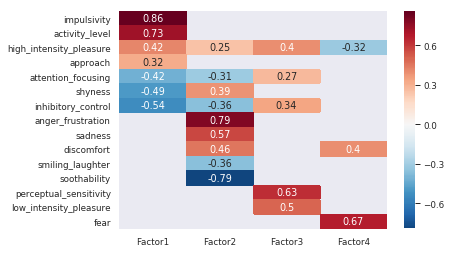

In [21]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(context='paper')
mask_upper = fa.loadings
mask_upper = mask_upper[mask_upper>=0.25]
mask_lower = fa.loadings
mask_lower = mask_lower[mask_lower<=-0.25]
mask = mask_upper.radd(mask_lower, fill_value=0)
mask = mask.sort_values(by=['Factor1','Factor2','Factor3'], ascending=False)
sns.heatmap(mask, annot=True, cmap='RdBu_r', center=0)
plt.savefig(study_home + '/results/loadings_labeled_3factor.svg')
plt.show()

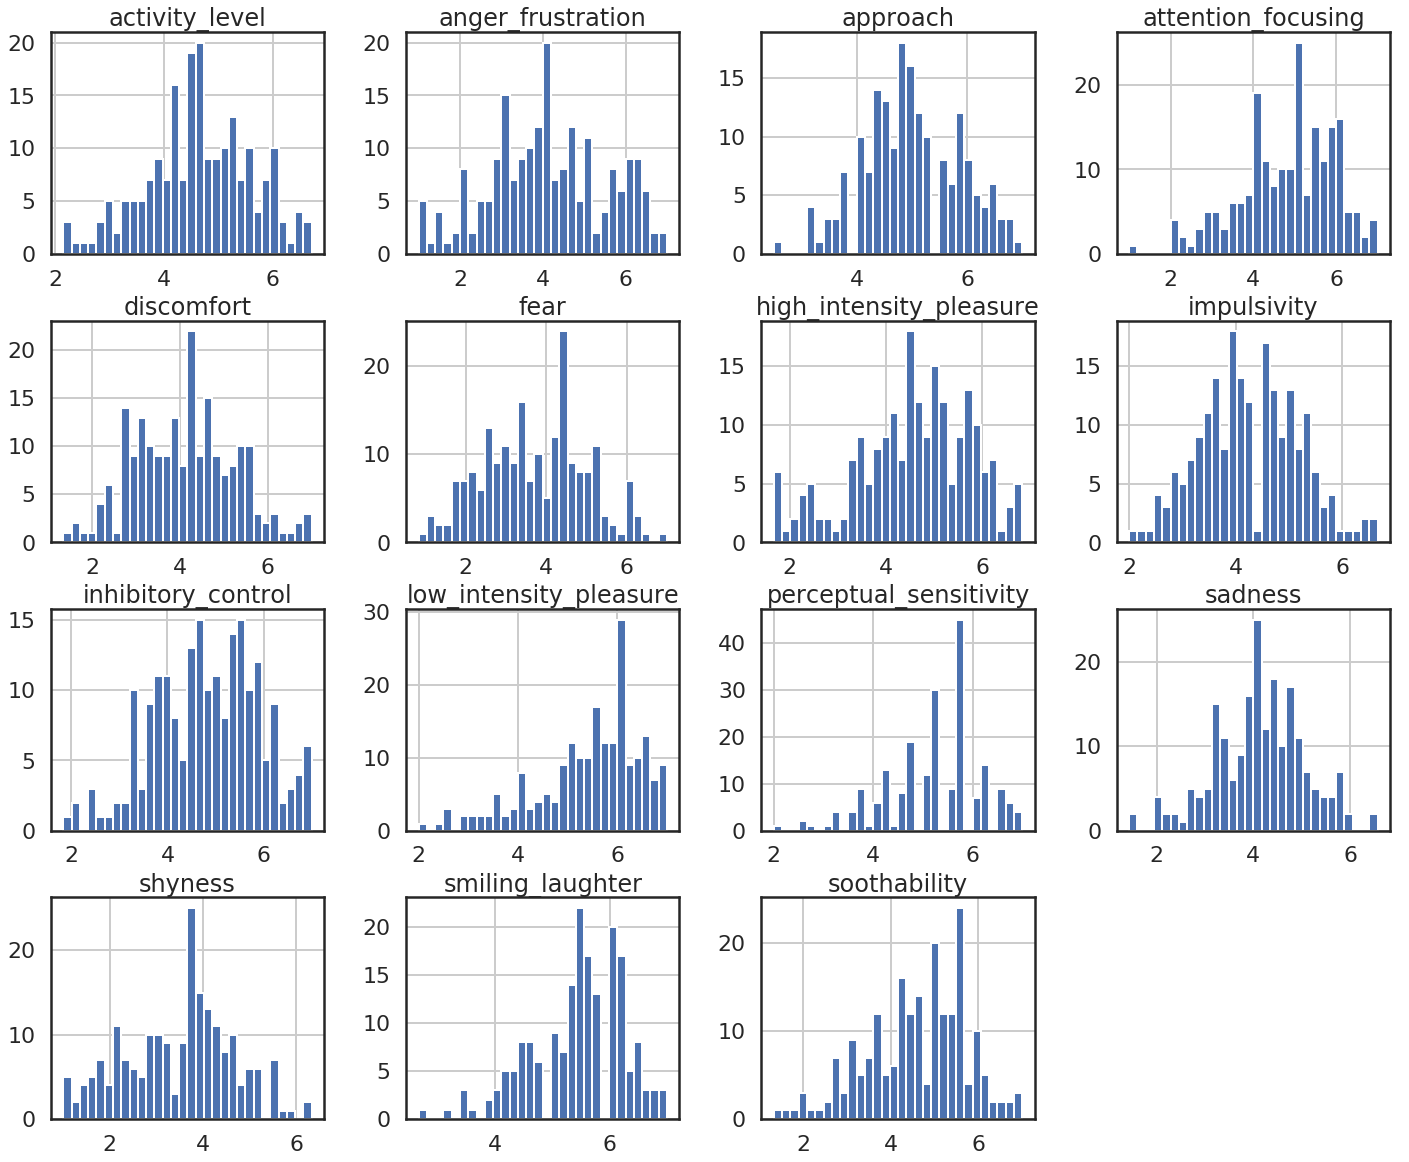

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='poster',style='white')
features.hist(bins=30, figsize=(24,20))
plt.savefig(study_home + '/results/scale_distributions.svg')
plt.show()